# Sentiment Analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from textblob import TextBlob


In [2]:
# Load your DataFrame 
df = pd.read_csv('gendered_data.csv') 

print(df.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'headquarters_state', 'Lemmatized_Description',
       'Agentic_Words', 'Communal_Words', 'Agentic_Count', 'Communal_Count',
       'Gendered_Ratio', 'job_state_encoded', 'headquarters_state_encoded',
       'Type of ownership_encoded', 'Industry_encoded', 'Sector_encoded',
       'job_simp_encoded', 'seniority_encoded', 'num_comp_encoded', 'Ratio',
       'Gender_Bias'],
      dtype='object')


In [3]:

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Create a new column for sentiment
df['Sentiment'] = df['Lemmatized_Description'].apply(get_sentiment)


In [21]:
# Compute the correlation between the 'Sentiment' and 'Gender_Bias'
correlation = df[['Sentiment', 'Gender_Bias']].corr().iloc[0, 1]
print(f"Correlation between Sentiment and Gender_Bias: {correlation}")


Correlation between Sentiment and Gender_Bias: -0.0667304795680665


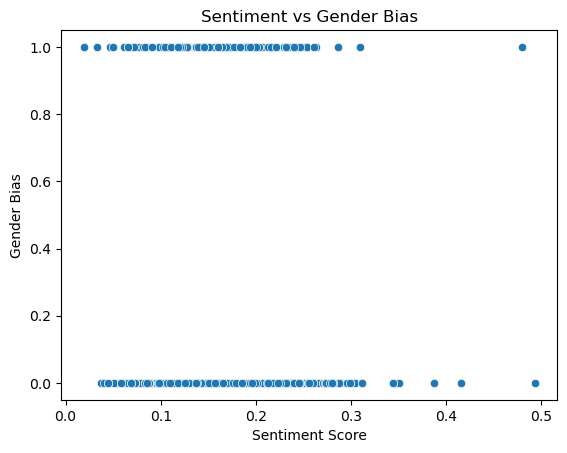

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Sentiment vs Gender_Bias
sns.scatterplot(x='Sentiment', y='gender_bias', data=df)
plt.title('Sentiment vs Gender Bias')
plt.xlabel('Sentiment Score')
plt.ylabel('Gender Bias')
plt.show()


A correlation coefficient of -0.067 indicates a very weak negative relationship between sentiment and gender bias. Here’s how to interpret this result:

Interpretation
Weak Negative Correlation: The value -0.067 is close to 0, suggesting that there is a very weak negative relationship between sentiment and gender bias. This means that, based on your data, higher sentiment scores (more positive sentiment) are only slightly associated with a lower likelihood of gender bias, but the relationship is not strong.
Implications
Low Impact: The weak correlation implies that sentiment may not be a strong predictor of gender bias in this dataset. Other features or factors might be more relevant in predicting gender bias.

Further Exploration: You might want to explore other features or use more sophisticated techniques for feature extraction and analysis. For example:

Advanced Sentiment Analysis: Use more advanced NLP models like VADER or BERT for better sentiment understanding.
Feature Engineering: Consider other textual features or combine multiple features for better predictions.
Model Comparison: Compare different models and features to improve prediction accuracy.
Visualize Results: You might want to visualize the sentiment scores against the gender bias to see if there are any patterns that the correlation coefficient doesn’t fully capture.

In [33]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'gender_bias','Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio', 
    'job_state_encoded', 'headquarters_state_encoded', 'Type of ownership_encoded',
    'Industry_encoded', 'Sector_encoded', 'job_simp_encoded', 
    'seniority_encoded', 'num_comp_encoded','Sentiment'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]


# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Extract correlations with Sentiment
sentiment_correlations = correlation_matrix['Sentiment']

# Exclude correlation with itself
sentiment_correlations = sentiment_correlations.drop(['Sentiment'])

# Sort the correlations from most to least correlated
sorted_sentiment_correlations = sentiment_correlations.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_sentiment_correlations)

python_yn                     0.255360
excel                         0.241357
aws                           0.136928
spark                         0.136409
min_salary                    0.122588
Founded                       0.117334
Communal_Count                0.116259
avg_salary                    0.114865
max_salary                    0.105808
seniority_encoded             0.096480
same_state                    0.072535
Rating                        0.065216
Industry_encoded              0.059917
employer_provided             0.033923
Sector_encoded                0.033162
Agentic_Count                 0.003123
Type of ownership_encoded    -0.002440
R_yn                         -0.008355
num_comp_encoded             -0.014112
num_comp                     -0.014112
Gendered_Ratio               -0.024865
hourly                       -0.032546
gender_bias                  -0.066730
job_simp_encoded             -0.121084
desc_len                     -0.138815
headquarters_state_encode

/var/folders/fj/6115v37x4dz0tt41cflnv2cm0000gn/T/ipykernel_66656/3049677098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_correlations.index, y=sentiment_correlations.values, palette='coolwarm')


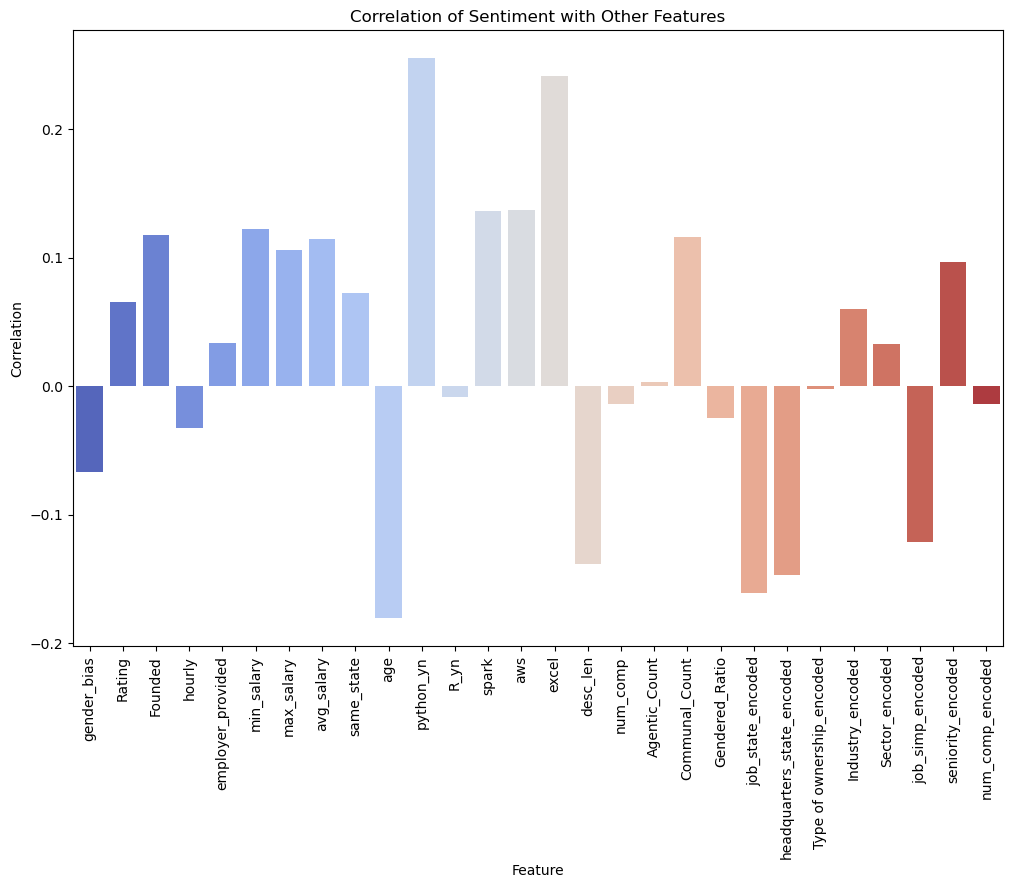

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation of Sentiment with other features
plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_correlations.index, y=sentiment_correlations.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation of Sentiment with Other Features')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

bar plot where each bar represents the correlation between the Sentiment feature and another feature in your dataset. The height of each bar indicates the strength and direction of the correlation, and the color of the bars provides a visual cue about the correlation values, thanks to the coolwarm palette.